## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49.2ms	remaining: 49.1s
1:	learn: 0.9301086	total: 51.2ms	remaining: 25.6s
2:	learn: 0.9005637	total: 53.3ms	remaining: 17.7s
3:	learn: 0.8720983	total: 55.5ms	remaining: 13.8s
4:	learn: 0.8467410	total: 57.6ms	remaining: 11.5s
5:	learn: 0.8226672	total: 59.5ms	remaining: 9.86s
6:	learn: 0.7994702	total: 61.6ms	remaining: 8.73s
7:	learn: 0.7784272	total: 63.5ms	remaining: 7.87s
8:	learn: 0.7602192	total: 65.6ms	remaining: 7.22s
9:	learn: 0.7412421	total: 67.5ms	remaining: 6.69s
10:	learn: 0.7247930	total: 69.5ms	remaining: 6.25s
11:	learn: 0.7089951	total: 71.5ms	remaining: 5.88s
12:	learn: 0.6951345	total: 73.3ms	remaining: 5.57s
13:	learn: 0.6809276	total: 75.3ms	remaining: 5.3s
14:	learn: 0.6692630	total: 77.3ms	remaining: 5.07s
15:	learn: 0.6588323	total: 79.2ms	remaining: 4.87s
16:	learn: 0.6472700	total: 81ms	remaining: 4.68s
17:	learn: 0.6379982	total: 82.9ms	remaining: 4.52s
18:	learn: 0.6294674	total: 84.9ms	remaining: 4.38s
19:	learn: 0.6193295	tota

59:	learn: 0.4824455	total: 167ms	remaining: 2.62s
60:	learn: 0.4809744	total: 169ms	remaining: 2.6s
61:	learn: 0.4801376	total: 171ms	remaining: 2.59s
62:	learn: 0.4792422	total: 173ms	remaining: 2.57s
63:	learn: 0.4780719	total: 175ms	remaining: 2.56s
64:	learn: 0.4771984	total: 177ms	remaining: 2.55s
65:	learn: 0.4759610	total: 179ms	remaining: 2.53s
66:	learn: 0.4750287	total: 181ms	remaining: 2.52s
67:	learn: 0.4740093	total: 183ms	remaining: 2.51s
68:	learn: 0.4732612	total: 185ms	remaining: 2.49s
69:	learn: 0.4727266	total: 187ms	remaining: 2.48s
70:	learn: 0.4716549	total: 189ms	remaining: 2.47s
71:	learn: 0.4709088	total: 191ms	remaining: 2.46s
72:	learn: 0.4697594	total: 193ms	remaining: 2.45s
73:	learn: 0.4690934	total: 195ms	remaining: 2.44s
74:	learn: 0.4680942	total: 197ms	remaining: 2.43s
75:	learn: 0.4672726	total: 199ms	remaining: 2.42s
76:	learn: 0.4664479	total: 201ms	remaining: 2.41s
77:	learn: 0.4656044	total: 203ms	remaining: 2.4s
78:	learn: 0.4645375	total: 205ms

83:	learn: 0.4604376	total: 214ms	remaining: 2.34s
84:	learn: 0.4596603	total: 217ms	remaining: 2.33s
85:	learn: 0.4587835	total: 219ms	remaining: 2.32s
86:	learn: 0.4583577	total: 220ms	remaining: 2.31s
87:	learn: 0.4577999	total: 222ms	remaining: 2.3s
88:	learn: 0.4572657	total: 224ms	remaining: 2.29s
89:	learn: 0.4569360	total: 226ms	remaining: 2.28s
90:	learn: 0.4559969	total: 228ms	remaining: 2.27s
91:	learn: 0.4549716	total: 230ms	remaining: 2.27s
92:	learn: 0.4544919	total: 231ms	remaining: 2.26s
93:	learn: 0.4537693	total: 233ms	remaining: 2.25s
94:	learn: 0.4532673	total: 235ms	remaining: 2.24s
95:	learn: 0.4526987	total: 237ms	remaining: 2.23s
96:	learn: 0.4520952	total: 239ms	remaining: 2.22s
97:	learn: 0.4513919	total: 241ms	remaining: 2.22s
98:	learn: 0.4503747	total: 243ms	remaining: 2.21s
99:	learn: 0.4494783	total: 245ms	remaining: 2.2s
100:	learn: 0.4487329	total: 247ms	remaining: 2.19s
101:	learn: 0.4481325	total: 249ms	remaining: 2.19s
102:	learn: 0.4475445	total: 25

142:	learn: 0.4282748	total: 333ms	remaining: 1.99s
143:	learn: 0.4277528	total: 335ms	remaining: 1.99s
144:	learn: 0.4274087	total: 337ms	remaining: 1.99s
145:	learn: 0.4271984	total: 339ms	remaining: 1.98s
146:	learn: 0.4268458	total: 341ms	remaining: 1.98s
147:	learn: 0.4264987	total: 343ms	remaining: 1.97s
148:	learn: 0.4262192	total: 345ms	remaining: 1.97s
149:	learn: 0.4257966	total: 346ms	remaining: 1.96s
150:	learn: 0.4253062	total: 348ms	remaining: 1.96s
151:	learn: 0.4247446	total: 350ms	remaining: 1.95s
152:	learn: 0.4237365	total: 352ms	remaining: 1.95s
153:	learn: 0.4233079	total: 354ms	remaining: 1.95s
154:	learn: 0.4228876	total: 356ms	remaining: 1.94s
155:	learn: 0.4225404	total: 358ms	remaining: 1.94s
156:	learn: 0.4222831	total: 360ms	remaining: 1.93s
157:	learn: 0.4218088	total: 362ms	remaining: 1.93s
158:	learn: 0.4213239	total: 364ms	remaining: 1.93s
159:	learn: 0.4210022	total: 366ms	remaining: 1.92s
160:	learn: 0.4201256	total: 368ms	remaining: 1.92s
161:	learn: 

166:	learn: 0.4176884	total: 380ms	remaining: 1.9s
167:	learn: 0.4173026	total: 383ms	remaining: 1.89s
168:	learn: 0.4170486	total: 384ms	remaining: 1.89s
169:	learn: 0.4165960	total: 386ms	remaining: 1.89s
170:	learn: 0.4161870	total: 389ms	remaining: 1.88s
171:	learn: 0.4156228	total: 391ms	remaining: 1.88s
172:	learn: 0.4153041	total: 393ms	remaining: 1.88s
173:	learn: 0.4148857	total: 395ms	remaining: 1.88s
174:	learn: 0.4144190	total: 397ms	remaining: 1.87s
175:	learn: 0.4140875	total: 399ms	remaining: 1.87s
176:	learn: 0.4136755	total: 401ms	remaining: 1.86s
177:	learn: 0.4133860	total: 403ms	remaining: 1.86s
178:	learn: 0.4129780	total: 405ms	remaining: 1.86s
179:	learn: 0.4122907	total: 407ms	remaining: 1.85s
180:	learn: 0.4119188	total: 409ms	remaining: 1.85s
181:	learn: 0.4115412	total: 412ms	remaining: 1.85s
182:	learn: 0.4112620	total: 414ms	remaining: 1.85s
183:	learn: 0.4107734	total: 416ms	remaining: 1.84s
184:	learn: 0.4104881	total: 418ms	remaining: 1.84s
185:	learn: 0

222:	learn: 0.3978579	total: 498ms	remaining: 1.73s
223:	learn: 0.3976462	total: 500ms	remaining: 1.73s
224:	learn: 0.3973704	total: 502ms	remaining: 1.73s
225:	learn: 0.3971729	total: 504ms	remaining: 1.73s
226:	learn: 0.3968841	total: 507ms	remaining: 1.73s
227:	learn: 0.3965787	total: 509ms	remaining: 1.72s
228:	learn: 0.3963073	total: 511ms	remaining: 1.72s
229:	learn: 0.3960925	total: 513ms	remaining: 1.72s
230:	learn: 0.3957018	total: 516ms	remaining: 1.72s
231:	learn: 0.3954162	total: 518ms	remaining: 1.71s
232:	learn: 0.3951665	total: 520ms	remaining: 1.71s
233:	learn: 0.3949269	total: 522ms	remaining: 1.71s
234:	learn: 0.3945894	total: 524ms	remaining: 1.7s
235:	learn: 0.3944181	total: 526ms	remaining: 1.7s
236:	learn: 0.3941497	total: 528ms	remaining: 1.7s
237:	learn: 0.3939819	total: 530ms	remaining: 1.7s
238:	learn: 0.3938322	total: 532ms	remaining: 1.69s
239:	learn: 0.3935463	total: 534ms	remaining: 1.69s
240:	learn: 0.3933166	total: 536ms	remaining: 1.69s
241:	learn: 0.39

244:	learn: 0.3923955	total: 543ms	remaining: 1.67s
245:	learn: 0.3922312	total: 546ms	remaining: 1.67s
246:	learn: 0.3919499	total: 548ms	remaining: 1.67s
247:	learn: 0.3917420	total: 550ms	remaining: 1.67s
248:	learn: 0.3915186	total: 552ms	remaining: 1.66s
249:	learn: 0.3912759	total: 554ms	remaining: 1.66s
250:	learn: 0.3908375	total: 556ms	remaining: 1.66s
251:	learn: 0.3904815	total: 558ms	remaining: 1.66s
252:	learn: 0.3902127	total: 560ms	remaining: 1.65s
253:	learn: 0.3900274	total: 562ms	remaining: 1.65s
254:	learn: 0.3898171	total: 564ms	remaining: 1.65s
255:	learn: 0.3896180	total: 566ms	remaining: 1.64s
256:	learn: 0.3894251	total: 568ms	remaining: 1.64s
257:	learn: 0.3892139	total: 570ms	remaining: 1.64s
258:	learn: 0.3889352	total: 572ms	remaining: 1.64s
259:	learn: 0.3886531	total: 574ms	remaining: 1.63s
260:	learn: 0.3884539	total: 576ms	remaining: 1.63s
261:	learn: 0.3882459	total: 578ms	remaining: 1.63s
262:	learn: 0.3881101	total: 581ms	remaining: 1.63s
263:	learn: 

302:	learn: 0.3789297	total: 662ms	remaining: 1.52s
303:	learn: 0.3787482	total: 665ms	remaining: 1.52s
304:	learn: 0.3786528	total: 666ms	remaining: 1.52s
305:	learn: 0.3784406	total: 668ms	remaining: 1.52s
306:	learn: 0.3782934	total: 670ms	remaining: 1.51s
307:	learn: 0.3781631	total: 672ms	remaining: 1.51s
308:	learn: 0.3779278	total: 674ms	remaining: 1.51s
309:	learn: 0.3777358	total: 677ms	remaining: 1.5s
310:	learn: 0.3775809	total: 678ms	remaining: 1.5s
311:	learn: 0.3774323	total: 680ms	remaining: 1.5s
312:	learn: 0.3772732	total: 682ms	remaining: 1.5s
313:	learn: 0.3771184	total: 685ms	remaining: 1.5s
314:	learn: 0.3769370	total: 687ms	remaining: 1.49s
315:	learn: 0.3766643	total: 689ms	remaining: 1.49s
316:	learn: 0.3764891	total: 691ms	remaining: 1.49s
317:	learn: 0.3762751	total: 693ms	remaining: 1.49s
318:	learn: 0.3761284	total: 695ms	remaining: 1.48s
319:	learn: 0.3760168	total: 697ms	remaining: 1.48s
320:	learn: 0.3757763	total: 699ms	remaining: 1.48s
321:	learn: 0.375

324:	learn: 0.3750004	total: 708ms	remaining: 1.47s
325:	learn: 0.3749086	total: 710ms	remaining: 1.47s
326:	learn: 0.3746654	total: 712ms	remaining: 1.46s
327:	learn: 0.3745405	total: 714ms	remaining: 1.46s
328:	learn: 0.3743710	total: 716ms	remaining: 1.46s
329:	learn: 0.3741679	total: 718ms	remaining: 1.46s
330:	learn: 0.3738646	total: 720ms	remaining: 1.45s
331:	learn: 0.3736647	total: 722ms	remaining: 1.45s
332:	learn: 0.3733429	total: 724ms	remaining: 1.45s
333:	learn: 0.3732059	total: 726ms	remaining: 1.45s
334:	learn: 0.3730574	total: 728ms	remaining: 1.45s
335:	learn: 0.3728663	total: 730ms	remaining: 1.44s
336:	learn: 0.3727111	total: 732ms	remaining: 1.44s
337:	learn: 0.3724765	total: 735ms	remaining: 1.44s
338:	learn: 0.3722959	total: 737ms	remaining: 1.44s
339:	learn: 0.3720213	total: 739ms	remaining: 1.43s
340:	learn: 0.3718316	total: 741ms	remaining: 1.43s
341:	learn: 0.3716519	total: 743ms	remaining: 1.43s
342:	learn: 0.3714592	total: 745ms	remaining: 1.43s
343:	learn: 

382:	learn: 0.3649246	total: 827ms	remaining: 1.33s
383:	learn: 0.3647854	total: 830ms	remaining: 1.33s
384:	learn: 0.3646814	total: 832ms	remaining: 1.33s
385:	learn: 0.3645091	total: 834ms	remaining: 1.33s
386:	learn: 0.3643695	total: 836ms	remaining: 1.32s
387:	learn: 0.3641687	total: 838ms	remaining: 1.32s
388:	learn: 0.3640529	total: 840ms	remaining: 1.32s
389:	learn: 0.3639296	total: 842ms	remaining: 1.32s
390:	learn: 0.3637044	total: 844ms	remaining: 1.31s
391:	learn: 0.3636336	total: 846ms	remaining: 1.31s
392:	learn: 0.3635003	total: 848ms	remaining: 1.31s
393:	learn: 0.3633029	total: 850ms	remaining: 1.31s
394:	learn: 0.3632136	total: 852ms	remaining: 1.3s
395:	learn: 0.3629529	total: 854ms	remaining: 1.3s
396:	learn: 0.3627743	total: 857ms	remaining: 1.3s
397:	learn: 0.3626747	total: 859ms	remaining: 1.3s
398:	learn: 0.3625881	total: 861ms	remaining: 1.3s
399:	learn: 0.3622963	total: 863ms	remaining: 1.29s
400:	learn: 0.3622314	total: 865ms	remaining: 1.29s
401:	learn: 0.362

404:	learn: 0.3614255	total: 874ms	remaining: 1.28s
405:	learn: 0.3613607	total: 876ms	remaining: 1.28s
406:	learn: 0.3612875	total: 878ms	remaining: 1.28s
407:	learn: 0.3611516	total: 880ms	remaining: 1.28s
408:	learn: 0.3609621	total: 882ms	remaining: 1.27s
409:	learn: 0.3608193	total: 884ms	remaining: 1.27s
410:	learn: 0.3604920	total: 886ms	remaining: 1.27s
411:	learn: 0.3603038	total: 888ms	remaining: 1.27s
412:	learn: 0.3602055	total: 890ms	remaining: 1.26s
413:	learn: 0.3599094	total: 892ms	remaining: 1.26s
414:	learn: 0.3597887	total: 894ms	remaining: 1.26s
415:	learn: 0.3595791	total: 897ms	remaining: 1.26s
416:	learn: 0.3594487	total: 899ms	remaining: 1.26s
417:	learn: 0.3592759	total: 901ms	remaining: 1.25s
418:	learn: 0.3591088	total: 903ms	remaining: 1.25s
419:	learn: 0.3589470	total: 905ms	remaining: 1.25s
420:	learn: 0.3587972	total: 907ms	remaining: 1.25s
421:	learn: 0.3586831	total: 908ms	remaining: 1.24s
422:	learn: 0.3585620	total: 910ms	remaining: 1.24s
423:	learn: 

464:	learn: 0.3527831	total: 992ms	remaining: 1.14s
465:	learn: 0.3526445	total: 994ms	remaining: 1.14s
466:	learn: 0.3525102	total: 996ms	remaining: 1.14s
467:	learn: 0.3523547	total: 998ms	remaining: 1.13s
468:	learn: 0.3522115	total: 1000ms	remaining: 1.13s
469:	learn: 0.3521029	total: 1s	remaining: 1.13s
470:	learn: 0.3519673	total: 1s	remaining: 1.13s
471:	learn: 0.3518082	total: 1.01s	remaining: 1.13s
472:	learn: 0.3516593	total: 1.01s	remaining: 1.12s
473:	learn: 0.3514906	total: 1.01s	remaining: 1.12s
474:	learn: 0.3513843	total: 1.01s	remaining: 1.12s
475:	learn: 0.3512406	total: 1.01s	remaining: 1.12s
476:	learn: 0.3510044	total: 1.02s	remaining: 1.11s
477:	learn: 0.3509121	total: 1.02s	remaining: 1.11s
478:	learn: 0.3507270	total: 1.02s	remaining: 1.11s
479:	learn: 0.3506003	total: 1.02s	remaining: 1.11s
480:	learn: 0.3505111	total: 1.02s	remaining: 1.1s
481:	learn: 0.3503906	total: 1.03s	remaining: 1.1s
482:	learn: 0.3501522	total: 1.03s	remaining: 1.1s
483:	learn: 0.350049

486:	learn: 0.3496172	total: 1.04s	remaining: 1.09s
487:	learn: 0.3494609	total: 1.04s	remaining: 1.09s
488:	learn: 0.3493200	total: 1.04s	remaining: 1.09s
489:	learn: 0.3491550	total: 1.04s	remaining: 1.08s
490:	learn: 0.3490323	total: 1.04s	remaining: 1.08s
491:	learn: 0.3488767	total: 1.05s	remaining: 1.08s
492:	learn: 0.3487285	total: 1.05s	remaining: 1.08s
493:	learn: 0.3486318	total: 1.05s	remaining: 1.08s
494:	learn: 0.3485016	total: 1.05s	remaining: 1.07s
495:	learn: 0.3484072	total: 1.05s	remaining: 1.07s
496:	learn: 0.3482698	total: 1.06s	remaining: 1.07s
497:	learn: 0.3481630	total: 1.06s	remaining: 1.07s
498:	learn: 0.3480855	total: 1.06s	remaining: 1.06s
499:	learn: 0.3478655	total: 1.06s	remaining: 1.06s
500:	learn: 0.3477966	total: 1.06s	remaining: 1.06s
501:	learn: 0.3476142	total: 1.07s	remaining: 1.06s
502:	learn: 0.3474667	total: 1.07s	remaining: 1.05s
503:	learn: 0.3473844	total: 1.07s	remaining: 1.05s
504:	learn: 0.3471852	total: 1.07s	remaining: 1.05s
505:	learn: 

546:	learn: 0.3419673	total: 1.16s	remaining: 957ms
547:	learn: 0.3418121	total: 1.16s	remaining: 955ms
548:	learn: 0.3416228	total: 1.16s	remaining: 953ms
549:	learn: 0.3414331	total: 1.16s	remaining: 951ms
550:	learn: 0.3413090	total: 1.16s	remaining: 948ms
551:	learn: 0.3411591	total: 1.17s	remaining: 946ms
552:	learn: 0.3410901	total: 1.17s	remaining: 944ms
553:	learn: 0.3409923	total: 1.17s	remaining: 942ms
554:	learn: 0.3408730	total: 1.17s	remaining: 939ms
555:	learn: 0.3408310	total: 1.17s	remaining: 937ms
556:	learn: 0.3407365	total: 1.18s	remaining: 935ms
557:	learn: 0.3406506	total: 1.18s	remaining: 933ms
558:	learn: 0.3405352	total: 1.18s	remaining: 931ms
559:	learn: 0.3404352	total: 1.18s	remaining: 928ms
560:	learn: 0.3403419	total: 1.18s	remaining: 926ms
561:	learn: 0.3402836	total: 1.19s	remaining: 924ms
562:	learn: 0.3402264	total: 1.19s	remaining: 922ms
563:	learn: 0.3400466	total: 1.19s	remaining: 920ms
564:	learn: 0.3399235	total: 1.19s	remaining: 917ms
565:	learn: 

569:	learn: 0.3393241	total: 1.2s	remaining: 908ms
570:	learn: 0.3392368	total: 1.21s	remaining: 906ms
571:	learn: 0.3391373	total: 1.21s	remaining: 903ms
572:	learn: 0.3390261	total: 1.21s	remaining: 901ms
573:	learn: 0.3389126	total: 1.21s	remaining: 899ms
574:	learn: 0.3388268	total: 1.21s	remaining: 897ms
575:	learn: 0.3387474	total: 1.22s	remaining: 895ms
576:	learn: 0.3386361	total: 1.22s	remaining: 893ms
577:	learn: 0.3385706	total: 1.22s	remaining: 891ms
578:	learn: 0.3384814	total: 1.22s	remaining: 889ms
579:	learn: 0.3383559	total: 1.22s	remaining: 887ms
580:	learn: 0.3382469	total: 1.23s	remaining: 885ms
581:	learn: 0.3381645	total: 1.23s	remaining: 883ms
582:	learn: 0.3380538	total: 1.23s	remaining: 881ms
583:	learn: 0.3379690	total: 1.23s	remaining: 878ms
584:	learn: 0.3378924	total: 1.24s	remaining: 876ms
585:	learn: 0.3378307	total: 1.24s	remaining: 874ms
586:	learn: 0.3377186	total: 1.24s	remaining: 872ms
587:	learn: 0.3376434	total: 1.24s	remaining: 870ms
588:	learn: 0

624:	learn: 0.3339122	total: 1.32s	remaining: 791ms
625:	learn: 0.3337503	total: 1.32s	remaining: 789ms
626:	learn: 0.3336593	total: 1.32s	remaining: 787ms
627:	learn: 0.3335713	total: 1.32s	remaining: 785ms
628:	learn: 0.3333915	total: 1.33s	remaining: 783ms
629:	learn: 0.3333158	total: 1.33s	remaining: 781ms
630:	learn: 0.3332088	total: 1.33s	remaining: 779ms
631:	learn: 0.3331129	total: 1.33s	remaining: 777ms
632:	learn: 0.3330288	total: 1.33s	remaining: 774ms
633:	learn: 0.3328844	total: 1.34s	remaining: 772ms
634:	learn: 0.3328544	total: 1.34s	remaining: 770ms
635:	learn: 0.3327021	total: 1.34s	remaining: 768ms
636:	learn: 0.3326462	total: 1.34s	remaining: 766ms
637:	learn: 0.3325758	total: 1.34s	remaining: 764ms
638:	learn: 0.3324324	total: 1.35s	remaining: 761ms
639:	learn: 0.3323174	total: 1.35s	remaining: 759ms
640:	learn: 0.3322206	total: 1.35s	remaining: 757ms
641:	learn: 0.3321031	total: 1.35s	remaining: 755ms
642:	learn: 0.3319978	total: 1.35s	remaining: 753ms
643:	learn: 

648:	learn: 0.3313829	total: 1.37s	remaining: 740ms
649:	learn: 0.3313125	total: 1.37s	remaining: 738ms
650:	learn: 0.3311735	total: 1.37s	remaining: 736ms
651:	learn: 0.3310386	total: 1.37s	remaining: 734ms
652:	learn: 0.3309129	total: 1.38s	remaining: 732ms
653:	learn: 0.3308321	total: 1.38s	remaining: 729ms
654:	learn: 0.3307342	total: 1.38s	remaining: 727ms
655:	learn: 0.3306809	total: 1.38s	remaining: 725ms
656:	learn: 0.3305729	total: 1.38s	remaining: 723ms
657:	learn: 0.3304900	total: 1.39s	remaining: 721ms
658:	learn: 0.3303842	total: 1.39s	remaining: 718ms
659:	learn: 0.3302235	total: 1.39s	remaining: 716ms
660:	learn: 0.3300983	total: 1.39s	remaining: 714ms
661:	learn: 0.3299994	total: 1.39s	remaining: 712ms
662:	learn: 0.3299184	total: 1.4s	remaining: 710ms
663:	learn: 0.3298189	total: 1.4s	remaining: 707ms
664:	learn: 0.3296970	total: 1.4s	remaining: 705ms
665:	learn: 0.3296671	total: 1.4s	remaining: 703ms
666:	learn: 0.3295999	total: 1.4s	remaining: 701ms
667:	learn: 0.329

708:	learn: 0.3256952	total: 1.48s	remaining: 609ms
709:	learn: 0.3255982	total: 1.49s	remaining: 607ms
710:	learn: 0.3255301	total: 1.49s	remaining: 605ms
711:	learn: 0.3254442	total: 1.49s	remaining: 603ms
712:	learn: 0.3253361	total: 1.49s	remaining: 600ms
713:	learn: 0.3252431	total: 1.49s	remaining: 598ms
714:	learn: 0.3251186	total: 1.5s	remaining: 596ms
715:	learn: 0.3250323	total: 1.5s	remaining: 594ms
716:	learn: 0.3249511	total: 1.5s	remaining: 592ms
717:	learn: 0.3248372	total: 1.5s	remaining: 590ms
718:	learn: 0.3247371	total: 1.5s	remaining: 588ms
719:	learn: 0.3246676	total: 1.5s	remaining: 586ms
720:	learn: 0.3245862	total: 1.51s	remaining: 583ms
721:	learn: 0.3245270	total: 1.51s	remaining: 581ms
722:	learn: 0.3244558	total: 1.51s	remaining: 579ms
723:	learn: 0.3243835	total: 1.51s	remaining: 577ms
724:	learn: 0.3242957	total: 1.51s	remaining: 575ms
725:	learn: 0.3242628	total: 1.52s	remaining: 573ms
726:	learn: 0.3242076	total: 1.52s	remaining: 571ms
727:	learn: 0.3240

733:	learn: 0.3235120	total: 1.53s	remaining: 556ms
734:	learn: 0.3234421	total: 1.53s	remaining: 554ms
735:	learn: 0.3233367	total: 1.54s	remaining: 552ms
736:	learn: 0.3232438	total: 1.54s	remaining: 549ms
737:	learn: 0.3231289	total: 1.54s	remaining: 547ms
738:	learn: 0.3230697	total: 1.54s	remaining: 545ms
739:	learn: 0.3229734	total: 1.54s	remaining: 543ms
740:	learn: 0.3228697	total: 1.55s	remaining: 541ms
741:	learn: 0.3227984	total: 1.55s	remaining: 539ms
742:	learn: 0.3226895	total: 1.55s	remaining: 537ms
743:	learn: 0.3225924	total: 1.55s	remaining: 535ms
744:	learn: 0.3225096	total: 1.55s	remaining: 532ms
745:	learn: 0.3224088	total: 1.56s	remaining: 530ms
746:	learn: 0.3223202	total: 1.56s	remaining: 528ms
747:	learn: 0.3222404	total: 1.56s	remaining: 526ms
748:	learn: 0.3221810	total: 1.56s	remaining: 524ms
749:	learn: 0.3221342	total: 1.56s	remaining: 522ms
750:	learn: 0.3220746	total: 1.57s	remaining: 520ms
751:	learn: 0.3219897	total: 1.57s	remaining: 517ms
752:	learn: 

791:	learn: 0.3184514	total: 1.65s	remaining: 433ms
792:	learn: 0.3183529	total: 1.65s	remaining: 431ms
793:	learn: 0.3182569	total: 1.65s	remaining: 429ms
794:	learn: 0.3181932	total: 1.65s	remaining: 427ms
795:	learn: 0.3180848	total: 1.66s	remaining: 424ms
796:	learn: 0.3180327	total: 1.66s	remaining: 422ms
797:	learn: 0.3179305	total: 1.66s	remaining: 420ms
798:	learn: 0.3178456	total: 1.66s	remaining: 418ms
799:	learn: 0.3177655	total: 1.66s	remaining: 416ms
800:	learn: 0.3176826	total: 1.67s	remaining: 414ms
801:	learn: 0.3176217	total: 1.67s	remaining: 412ms
802:	learn: 0.3174842	total: 1.67s	remaining: 410ms
803:	learn: 0.3173800	total: 1.67s	remaining: 408ms
804:	learn: 0.3172892	total: 1.67s	remaining: 406ms
805:	learn: 0.3172199	total: 1.68s	remaining: 404ms
806:	learn: 0.3171379	total: 1.68s	remaining: 401ms
807:	learn: 0.3170699	total: 1.68s	remaining: 399ms
808:	learn: 0.3170027	total: 1.68s	remaining: 397ms
809:	learn: 0.3169244	total: 1.68s	remaining: 395ms
810:	learn: 

814:	learn: 0.3164726	total: 1.7s	remaining: 385ms
815:	learn: 0.3164087	total: 1.7s	remaining: 383ms
816:	learn: 0.3163590	total: 1.7s	remaining: 381ms
817:	learn: 0.3162644	total: 1.7s	remaining: 379ms
818:	learn: 0.3161739	total: 1.7s	remaining: 377ms
819:	learn: 0.3160986	total: 1.71s	remaining: 374ms
820:	learn: 0.3159951	total: 1.71s	remaining: 372ms
821:	learn: 0.3159403	total: 1.71s	remaining: 370ms
822:	learn: 0.3158160	total: 1.71s	remaining: 368ms
823:	learn: 0.3157523	total: 1.71s	remaining: 366ms
824:	learn: 0.3156673	total: 1.72s	remaining: 364ms
825:	learn: 0.3156288	total: 1.72s	remaining: 362ms
826:	learn: 0.3155257	total: 1.72s	remaining: 360ms
827:	learn: 0.3154546	total: 1.72s	remaining: 358ms
828:	learn: 0.3153664	total: 1.72s	remaining: 356ms
829:	learn: 0.3152896	total: 1.73s	remaining: 353ms
830:	learn: 0.3152050	total: 1.73s	remaining: 351ms
831:	learn: 0.3151385	total: 1.73s	remaining: 349ms
832:	learn: 0.3150922	total: 1.73s	remaining: 347ms
833:	learn: 0.314

872:	learn: 0.3120356	total: 1.81s	remaining: 263ms
873:	learn: 0.3119020	total: 1.81s	remaining: 261ms
874:	learn: 0.3118603	total: 1.81s	remaining: 259ms
875:	learn: 0.3117861	total: 1.81s	remaining: 257ms
876:	learn: 0.3116810	total: 1.82s	remaining: 255ms
877:	learn: 0.3116088	total: 1.82s	remaining: 253ms
878:	learn: 0.3115190	total: 1.82s	remaining: 251ms
879:	learn: 0.3114687	total: 1.82s	remaining: 249ms
880:	learn: 0.3113934	total: 1.82s	remaining: 246ms
881:	learn: 0.3113378	total: 1.83s	remaining: 244ms
882:	learn: 0.3112367	total: 1.83s	remaining: 242ms
883:	learn: 0.3111915	total: 1.83s	remaining: 240ms
884:	learn: 0.3111075	total: 1.83s	remaining: 238ms
885:	learn: 0.3110486	total: 1.83s	remaining: 236ms
886:	learn: 0.3109334	total: 1.84s	remaining: 234ms
887:	learn: 0.3108347	total: 1.84s	remaining: 232ms
888:	learn: 0.3107647	total: 1.84s	remaining: 230ms
889:	learn: 0.3107302	total: 1.84s	remaining: 228ms
890:	learn: 0.3106509	total: 1.84s	remaining: 226ms
891:	learn: 

898:	learn: 0.3100955	total: 1.86s	remaining: 209ms
899:	learn: 0.3100512	total: 1.86s	remaining: 207ms
900:	learn: 0.3100138	total: 1.86s	remaining: 205ms
901:	learn: 0.3099635	total: 1.86s	remaining: 203ms
902:	learn: 0.3098989	total: 1.87s	remaining: 201ms
903:	learn: 0.3098084	total: 1.87s	remaining: 199ms
904:	learn: 0.3097402	total: 1.87s	remaining: 196ms
905:	learn: 0.3096378	total: 1.87s	remaining: 194ms
906:	learn: 0.3095878	total: 1.88s	remaining: 192ms
907:	learn: 0.3095154	total: 1.88s	remaining: 190ms
908:	learn: 0.3094688	total: 1.88s	remaining: 188ms
909:	learn: 0.3093784	total: 1.88s	remaining: 186ms
910:	learn: 0.3093058	total: 1.88s	remaining: 184ms
911:	learn: 0.3092574	total: 1.89s	remaining: 182ms
912:	learn: 0.3092023	total: 1.89s	remaining: 180ms
913:	learn: 0.3091306	total: 1.89s	remaining: 178ms
914:	learn: 0.3090719	total: 1.89s	remaining: 176ms
915:	learn: 0.3090199	total: 1.89s	remaining: 174ms
916:	learn: 0.3089417	total: 1.9s	remaining: 172ms
917:	learn: 0

956:	learn: 0.3059772	total: 1.98s	remaining: 88.8ms
957:	learn: 0.3058989	total: 1.98s	remaining: 86.7ms
958:	learn: 0.3057985	total: 1.98s	remaining: 84.7ms
959:	learn: 0.3056692	total: 1.98s	remaining: 82.6ms
960:	learn: 0.3055777	total: 1.98s	remaining: 80.5ms
961:	learn: 0.3054462	total: 1.99s	remaining: 78.5ms
962:	learn: 0.3053516	total: 1.99s	remaining: 76.4ms
963:	learn: 0.3052664	total: 1.99s	remaining: 74.3ms
964:	learn: 0.3052264	total: 1.99s	remaining: 72.2ms
965:	learn: 0.3051873	total: 1.99s	remaining: 70.2ms
966:	learn: 0.3051018	total: 2s	remaining: 68.1ms
967:	learn: 0.3050172	total: 2s	remaining: 66ms
968:	learn: 0.3049470	total: 2s	remaining: 64ms
969:	learn: 0.3049028	total: 2s	remaining: 61.9ms
970:	learn: 0.3048446	total: 2s	remaining: 59.8ms
971:	learn: 0.3047712	total: 2s	remaining: 57.8ms
972:	learn: 0.3047313	total: 2.01s	remaining: 55.7ms
973:	learn: 0.3046600	total: 2.01s	remaining: 53.6ms
974:	learn: 0.3045983	total: 2.01s	remaining: 51.6ms
975:	learn: 0.3

981:	learn: 0.3041509	total: 2.02s	remaining: 37.1ms
982:	learn: 0.3041077	total: 2.03s	remaining: 35.1ms
983:	learn: 0.3040665	total: 2.03s	remaining: 33ms
984:	learn: 0.3040237	total: 2.03s	remaining: 30.9ms
985:	learn: 0.3039532	total: 2.03s	remaining: 28.9ms
986:	learn: 0.3038723	total: 2.04s	remaining: 26.8ms
987:	learn: 0.3038141	total: 2.04s	remaining: 24.8ms
988:	learn: 0.3037455	total: 2.04s	remaining: 22.7ms
989:	learn: 0.3036820	total: 2.04s	remaining: 20.6ms
990:	learn: 0.3036165	total: 2.04s	remaining: 18.6ms
991:	learn: 0.3035759	total: 2.05s	remaining: 16.5ms
992:	learn: 0.3035124	total: 2.05s	remaining: 14.4ms
993:	learn: 0.3034295	total: 2.05s	remaining: 12.4ms
994:	learn: 0.3033612	total: 2.05s	remaining: 10.3ms
995:	learn: 0.3033209	total: 2.06s	remaining: 8.25ms
996:	learn: 0.3032659	total: 2.06s	remaining: 6.19ms
997:	learn: 0.3032189	total: 2.06s	remaining: 4.13ms
998:	learn: 0.3031594	total: 2.06s	remaining: 2.06ms
999:	learn: 0.3030916	total: 2.06s	remaining: 0u

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
11920625.208911508


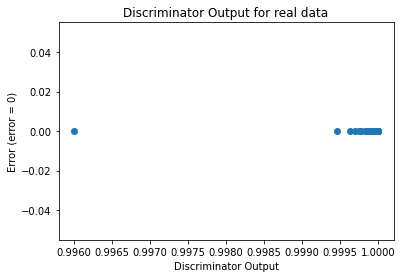

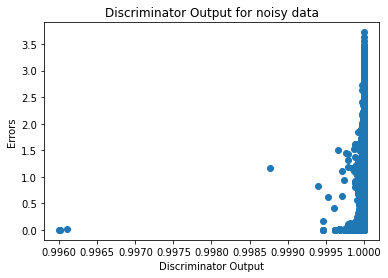

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9329]], device='cuda:0', requires_grad=True)
